## Прогнозирование коэффициента восстановления золота из руды

### 1. Подготовка данных

**1.1.** Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

Прочитаем файлы *gold_recovery_train.csv*, *gold_recovery_test.csv*, *gold_recovery_full.csv* и сохраним их в переменных *train*, *test*, *full* соответственно. Посмотрим таблицы и общую информацию о них.

In [2]:
train = pd.read_csv('/datasets/gold_recovery_train.csv', index_col='date', parse_dates=True)
display(train.head(5))
train.info()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant                      15598 non-null float64
primary_c

In [3]:
test = pd.read_csv('/datasets/gold_recovery_test.csv', index_col='date', parse_dates=True)
display(test.head(5))
test.info()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.input.feed_ag                    

In [4]:
full = pd.read_csv('/datasets/gold_recovery_full.csv', index_col='date', parse_dates=True)
display(full.head(5))
full.info()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant                      21170 non-null float64
primary_c

Датафрейм *train* содержит 16860 строк и 86 столбцов, *test* — 5856 строк и 52 столбца, *full* — 22716 строк и 86 столбцов. Данные индексируются по дате и времени. Единственный используемый тип данных — *float64*. Почти во всех столбцах присутствуют пропущенные значения.

**1.2.** Проверим правильность расчёта эффективности обогащения. Для этого вычислим её на обучающей выборке для признака *rougher.output.recovery* по формуле:
$$Recovery = \frac{C⋅(F-T)}{F⋅(C-T)}⋅100\%,$$
где:

* C — доля золота в концентрате после флотации (*rougher.output.concentrate_au*);
* F — доля золота в сырье/концентрате до флотации (*rougher.input.feed_au*);
* T — доля золота в отвальных хвостах после флотации (*rougher.output.tail_au*).

Для вычислений предварительно удалим из указанных признаков пропуски. Найдём MAE между расчётами и значениями признака *rougher.output.recovery*.

In [5]:
train_nanless = train.dropna(subset = ['rougher.output.concentrate_au', 'rougher.input.feed_au', 
                                       'rougher.output.tail_au', 'rougher.output.recovery'])
C = train_nanless['rougher.output.concentrate_au']
F = train_nanless['rougher.input.feed_au']
T = train_nanless['rougher.output.tail_au']
recovery = C * (F - T) * 100 / (F * (C - T))
print('MAE =', mean_absolute_error(train_nanless['rougher.output.recovery'], recovery))

MAE = 1.0898633667227423e-14


MAE между расчётами и исходными значениями оказалась практически равной нулю, следовательно эффективность обогащения рассчитана верно.

**1.3.** Проанализируем признаки, недоступные в тестовой выборке.

In [5]:
for i in full.columns:
    if i not in test.columns:
        print(i)

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

В тестовой выборке отсутсвуют все расчётные (*calculation*), а также выходные (*output*) признаки, в том числе целевые — *rougher.output.recovery* и *final.output.recovery*. Это объясняется тем, что указанные показатели замеряются и вычисляются позднее.

**1.4.** Добавим целевые признаки в тестовую выборку из датасета *full*.

In [6]:
test = test.merge(full[['rougher.output.recovery', 'final.output.recovery']], how='left', on='date')

Удалим пропущенные значения из целевых признаков в обучающей и тестовой выборках.

In [7]:
def delete_na(data):
    data.dropna(subset=['rougher.output.recovery', 'final.output.recovery'], inplace=True)
    print('Пропуски в целевых признаках:', data[['rougher.output.recovery', 'final.output.recovery']].isna().sum().sum())
    print('Размер выборки:', data.shape)

print('Обучающая выборка')
delete_na(train)
print()
print('Тестовая выборка')
delete_na(test)

Обучающая выборка
Пропуски в целевых признаках: 0
Размер выборки: (14149, 86)

Тестовая выборка
Пропуски в целевых признаках: 0
Размер выборки: (5290, 54)


Поскольку соседние по времени параметры часто похожи, заполним пропуски в других столбцах на основе предыдущих значений.

In [8]:
def fill_na(data):
    data.fillna(method='ffill', inplace=True)
    print('Пропуски в признаках:', data.isna().sum().sum())
    
print('Обучающая выборка')
fill_na(train)
print()
print('Тестовая выборка')
fill_na(test)

Обучающая выборка
Пропуски в признаках: 0

Тестовая выборка
Пропуски в признаках: 0


### 2. Анализ данных

**2.1.** Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

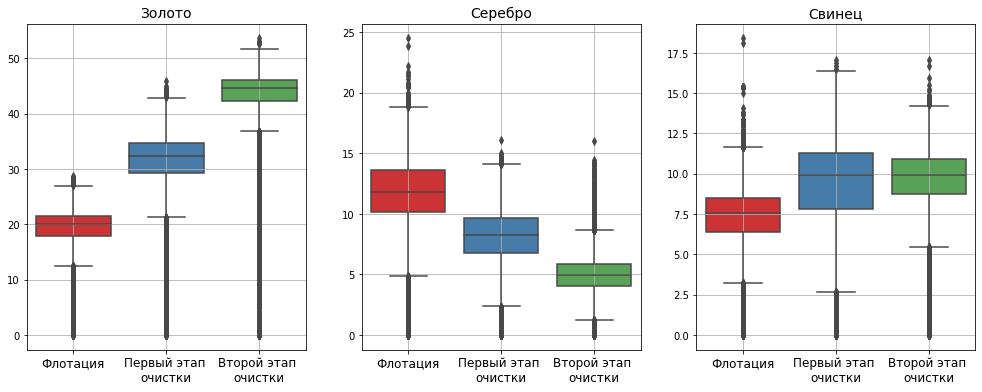

In [9]:
metals = {'Золото' : 'au',
          'Серебро' : 'ag',
          'Свинец' : 'pb'}
j = 0
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(17, 6)
for i in metals:
    sns.boxplot(ax=ax[j], palette='Set1',
                data=full[['rougher.output.concentrate_' + metals[i],
                           'primary_cleaner.output.concentrate_' + metals[i],
                           'final.output.concentrate_' + metals[i]]])
    ax[j].grid(True)
    ax[j].set_title(i, fontsize=14)
    ax[j].set_xticklabels(['Флотация', 'Первый этап \nочистки', 'Второй этап \nочистки'], fontsize=12)
    j += 1

С каждым этапом очистки концентрация золота растёт, а серебра — падает. Концентрация свинца увеличивается на первом этапе очистки, после чего остаётся примерно на одном уровне. При этом медианные значения концентрации золота на каждом из этапов значительно превышают аналогичные показатели для двух других металлов.

**2.2.** Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.

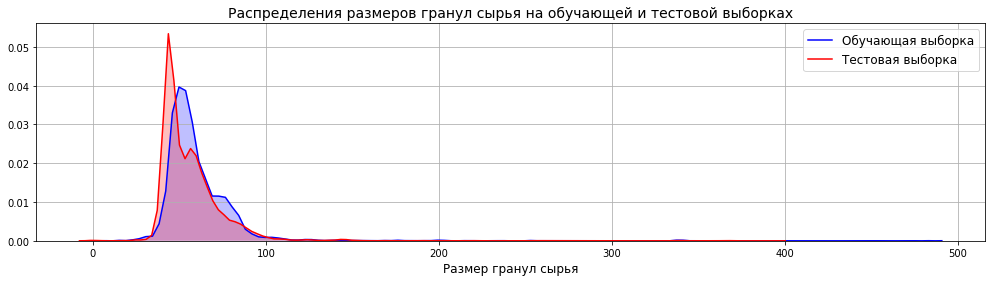

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(17, 4)
sns.kdeplot(train['rougher.input.feed_size'], shade=True, color='b', ax=ax)
sns.kdeplot(test['rougher.input.feed_size'], shade=True, color='r', ax=ax)
ax.legend(['Обучающая выборка', 'Тестовая выборка'], fontsize=12)
ax.set_title('Распределения размеров гранул сырья на обучающей и тестовой выборках', fontsize=14)
ax.set_xlabel('Размер гранул сырья', fontsize=12)
ax.grid(True)

Распределения размеров гранул сырья на обучающей и тестовой выборках похожи, но не идентичны, следовательно в обучении модели возможна небольшая ошибка.

**2.3.** Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [11]:
# Суммарная концентрация всех веществ в сырье
full['rougher.input_feed_total'] = (full['rougher.input.feed_ag'] + full['rougher.input.feed_pb'] +
                                    full['rougher.input.feed_sol'] + full['rougher.input.feed_au'])
# Суммарная концентрация всех веществ в черновом концентрате
full['rougher.output.concentrate_total'] = (full['rougher.output.concentrate_ag'] + full['rougher.output.concentrate_pb'] +
                                            full['rougher.output.concentrate_sol'] + full['rougher.output.concentrate_au'])
# Суммарная концентрация всех веществ в финальном концентрате
full['final.output.concentrate_total'] = (full['final.output.concentrate_ag'] + full['final.output.concentrate_pb'] +
                                          full['final.output.concentrate_sol'] + full['final.output.concentrate_au'])

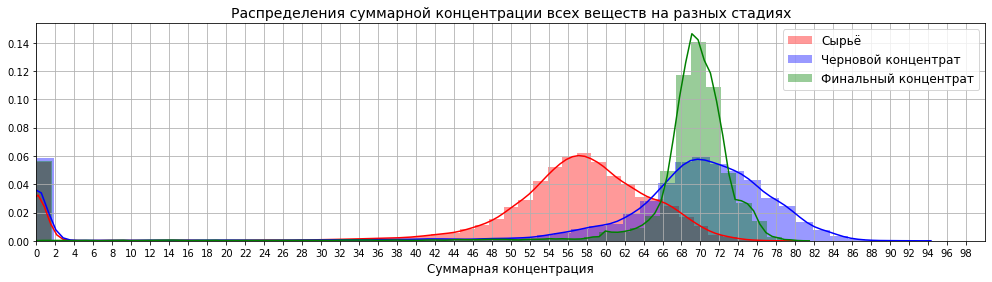

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(17, 4)
total_columns = {0 : ['rougher.input_feed_total',  'r'],
                 1 : ['rougher.output.concentrate_total', 'b'], 
                 2 : ['final.output.concentrate_total', 'g']}
for i in range(3):
    sns.distplot(full[full[total_columns[i][0]].notna()][total_columns[i][0]], ax=ax, color=total_columns[i][1])
ax.legend(['Сырьё', 'Черновой концентрат', 'Финальный концентрат'], fontsize=12)
ax.set_title('Распределения суммарной концентрации всех веществ на разных стадиях', fontsize=14)
ax.set_xlabel('Суммарная концентрация', fontsize=12)
ax.set_xticks(range(0, 100, 2))
ax.set_xlim(0, 100)
ax.grid(True)

Наименьшая суммарная концентрация веществ наблюдается в сырье. После флотации она увеличивается, при этом форма распределения почти не меняется. В финальном концентрате диапазон разброса значений заметно сужается. Также можно отметить большое количество аномально низких значений суммарной концентрации веществ на всех стадиях. Исследуем их более подробно, увеличив масштаб графика.

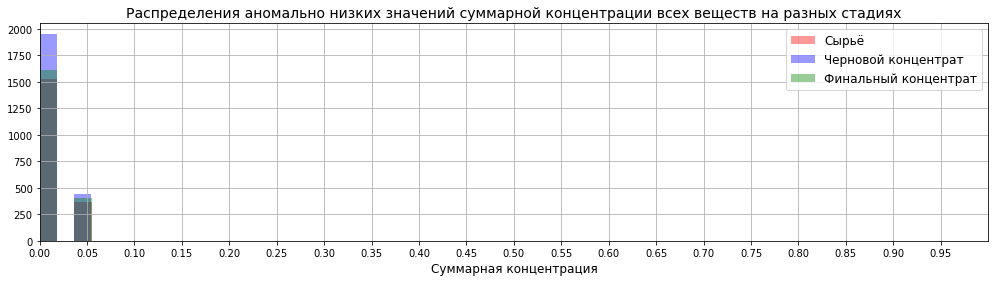

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(17, 4)
for i in range(3):
    sns.distplot(full[(full[total_columns[i][0]].notna()) & (full[total_columns[i][0]] < 1)][total_columns[i][0]], 
                 ax=ax, color=total_columns[i][1], kde=False, bins=50)
ax.legend(['Сырьё', 'Черновой концентрат', 'Финальный концентрат'], fontsize=12)
ax.set_title('Распределения аномально низких значений суммарной концентрации всех веществ на разных стадиях', fontsize=14)
ax.set_xlabel('Суммарная концентрация', fontsize=12)
ax.set_xticks(np.arange(0, 1, 0.05))
ax.set_xlim(0, 1)
ax.grid(True)

По графику видно, что в данных присутствует большое количество нулевых и очень близких к нулевым измерений. Удалим соответствующие им объекты из обучающей и тестовой выборок.

In [15]:
def drop_anomalies(data):
    for i in range(3):
        data = data.merge(full[total_columns[i][0]], how='left', on='date')
        data = data[data[total_columns[i][0]] > 0.1]
        data = data.drop(total_columns[i][0], axis=1)
    return data

In [16]:
train = drop_anomalies(train)
print('Обучающая выборка:', train.shape)
test = drop_anomalies(test)
print('Тестовая выборка:', test.shape)

Обучающая выборка: (13402, 86)
Тестовая выборка: (5134, 54)


### 3. Обучение модели

**3.1.** Напишем функцию для вычисления итоговой sMAPE, которая вычисляется по формулам:
$$\text{sMAPE} = \frac {1}{N} ⋅ \sum \limits _{i=1}^N \frac{|y_{i} - \hat y_{i}|}{\frac{|y_{i}| + |\hat y_{i}|}{2}} ⋅ 100 \% ,$$


$$\text{Итоговая sMAPE} = 25 \% ⋅ \text{sMAPE(rougher)} + 75 \% ⋅ \text{sMAPE(final)},$$
где:

* $y_{i}$ — значение целевого признака для объекта с порядковым номером i;
* $\hat y_{i}$ — значение предсказания для объекта с порядковым номером i;
* $N$ — количество объектов в выборке.

In [16]:
def sMAPE(y_true, y_predict):
    y_predict = pd.DataFrame(y_predict, columns=y_true.columns, index=y_true.index)
    # Эффективность обогащения чернового концентрата
    sMAPE_rougher = (abs(y_true['rougher.output.recovery'] - y_predict['rougher.output.recovery']) * 200 / 
                     (abs(y_true['rougher.output.recovery']) + abs(y_predict['rougher.output.recovery']))).mean()
    # Эффективность обогащения финального концентрата
    sMAPE_final = (abs(y_true['final.output.recovery'] - y_predict['final.output.recovery']) * 200 / 
                   (abs(y_true['final.output.recovery']) + abs(y_predict['final.output.recovery']))).mean()
    # Итоговая метрика
    sMAPE = 0.25 * sMAPE_rougher + 0.75 * sMAPE_final
    return sMAPE

sMAPE_score = make_scorer(sMAPE, greater_is_better=False)

**3.2.** Удалим из обучающей выборки все выходные и расчётные признаки, которые отсутствуют в тестовой выборке.

In [17]:
for i in train.columns:
    if i not in test.columns:
        train = train.drop(i, axis=1)

Сбросим индексы и выделим в обучающей и тестовой выборках целевые признаки (*rougher.output.recovery*, *final.output.recovery*).

In [18]:
# Сброс индексов
train = train.reset_index().drop('date', axis=1)
test = test.reset_index().drop('date', axis=1)
# Выделение целевых признаков
features_train = train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train = train[['rougher.output.recovery', 'final.output.recovery']]
features_test = test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test = test[['rougher.output.recovery', 'final.output.recovery']]
print(' ' * 11 + 'features    target')
print('Обучающая:', features_train.shape, target_train.shape)
print('Тестовая: ', features_test.shape, '', target_test.shape)

           features    target
Обучающая: (14149, 52) (14149, 2)
Тестовая:  (5290, 52)  (5290, 2)


Проведём масштабирование признаков.

In [19]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train[features_train.columns] = scaler.transform(features_train[features_train.columns])
features_test[features_test.columns] = scaler.transform(features_test[features_test.columns])

Обучим модели случайного леса с различными гиперпараметрами и кросс-валидацией по созданной ранее функции расчёта итоговой sMAPE и определим модель с наилучшими результатами.

In [ ]:
parameters = {'n_estimators': range(10, 61, 5),
              'max_depth': range(4, 21, 2)}
model = RandomForestRegressor(random_state=1)
gscv = GridSearchCV(model, parameters, cv=4, n_jobs=-1, scoring=sMAPE_score)
gscv.fit(features_train, target_train)
print('Случайный лес')
print('Лучшие гиперпараметры: ', (gscv.best_params_))
print('sMAPE = {:.2f} %'.format(abs(gscv.best_score_)))

Обучим модель линейной регрессии с кросс-валидацией по созданной ранее функции расчёта итоговой sMAPE.

In [22]:
model = LinearRegression()
cv = cross_validate(model, features_train, target_train, cv=4, n_jobs=-1, scoring=sMAPE_score)
print('Линейная регрессия')
print('sMAPE = {:.2f} %'.format(abs(cv['test_score'].mean())))

Линейная регрессия
sMAPE = 9.53 %


Наилучший результат (8.61%) показала модель случайного леса с максимальной глубиной, равной 4, и числом оценщиков, равным 30. Проверим её на тестовой выборке.

In [23]:
if abs(cv['test_score'].mean()) < abs(gscv.best_score_):
    model = LinearRegression()
else:
    model = RandomForestRegressor(random_state=1, 
                                  max_depth=gscv.best_params_['max_depth'], 
                                  n_estimators=gscv.best_params_['n_estimators'])
    
model.fit(features_train, target_train)
predict_test = model.predict(features_test)
print('Тестовая выборка')
print('sMAPE = {:.2f} %'.format(sMAPE(target_test, predict_test)))

Тестовая выборка
sMAPE = 6.88 %


Сравним полученный результат с результатом константной модели.

In [24]:
predict_constant = pd.DataFrame((target_train.median() for i in range(len(target_test))), index=target_test.index)
print('Константная модель')
print('sMAPE = {:.2f} %'.format(sMAPE(target_test, predict_constant)))

Константная модель
sMAPE = 7.22 %


Таким образом, итоговая sMAPE модели случайного леса (6.88%) оказалась ниже, чем соответствующий показатель для константной модели (7.22%), следовательно можно сделать вывод о её адекватности.

### 4. Вывод
В ходе выполнения проекта проведена предобработка данных, проверена правильность расчёта эффективности обогащения, исследованы распределения размеров гранул сырья, изменения концентрации металлов и суммарной концентрации всех веществ на разных этапах очистки, удалены объекты с нулевыми и аномально низкими измерениями. Построены модели случайного леса с различными гиперпараметрами и модель линейной регрессии, в результате чего выбрана модель с наилучшей метрикой sMAPE (модель случайного леса с максимальной глубиной, равной 4, и числом оценщиков, равным 30). Её качество и адекватность проверены на тестовой выборке. Итоговая sMAPE составила 6.88%.